# PRACTICA 2  
## LABORATORIO DE SEMINARIO DE SISTEMAS 2
### CARLOS JAVIER MARTINEZ POLANCO 201709282


#### Objetivos

* Desarrollar un notebook de análisis de datos que permita la carga, 
manipulación, visualización y generación de informes a partir de conjuntos de 
datos utilizando las librerías Pandas, NumPy y Matplotlib.

* Implementar técnicas de limpieza y transformación de datos utilizando Pandas 
para preparar el conjunto de datos.

* Crear visualizaciones interactivas y altamente informativas utilizando 
Matplotlib que permitan a los tomadores de decisiones explorar visualmente 
los datos.

## DATOS UTILIZADOS PARA LA PRACTICA

### Lectura de datos utlizando pandas y un DataFrame


In [1]:
import pandas as pd

ruta_archivo = "datos.csv"

# Lee el archivo CSV y carga los datos en un DataFrame
df = pd.read_csv(ruta_archivo)


# Seleccionar solo las columnas necesarias
df_reducido = df[['Course Title', 'Rating', 'Level', 'Duration', 'Schedule', 'Review', 'Keyword']]

df_reducido

,Course Title,Rating,Level,Duration,Schedule,Review,Keyword
0,Fashion as Design,4.8,Beginner level,20 hours (approximately),Flexible schedule,"2,813 reviews",Arts and Humanities
1,Modern American Poetry,4.4,Beginner level,Approx. 34 hours to complete,Flexible schedule,100 reviews,Arts and Humanities
2,Pixel Art for Video Games,4.5,Beginner level,9 hours (approximately),Flexible schedule,227 reviews,Arts and Humanities
3,Distribución digital de la música independiente,NaN,Beginner level,Approx. 8 hours to complete,Flexible schedule,NaN,Arts and Humanities
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Approx. 11 hours to complete,Flexible schedule,582 reviews,Arts and Humanities
...,...,...,...,...,...,...,...
9590,Power Onboarding,4.1,Beginner level,Approx. 7 hours to complete,Flexible schedule,36 reviews,Social Sciences
9591,Implementing Parent Feedback with Google Forms,4.9,Beginner level,NaN,NaN,77 reviews,Social Sciences
9592,"""Making"" Progress Teach-Out",4.2,Beginner level,Approx. 5 hours to complete,Flexible schedule,10 reviews,Social Sciences
9593,Use Microsoft PowerPoint to Create a Visual Sc...,4.5,Beginner level,1 hour,NaN,11 reviews,Social Sciences


## IMPORTAR EL MODULO CON LAS FUNCIONES DE LIMPIEZA Y TRANSFORMACION DE LA DATA



In [2]:
import funciones

## IMPLEMENTACION DE LA LIMPIEZA Y VALIDACION DE LOS REGISTROS


In [3]:

# Filtrar el DataFrame utilizando el método copy()
df_reducido = df_reducido.copy()

# Aplicar las funciones de limpieza a cada columna
df_reducido['Course Title'] = df_reducido['Course Title'].apply(funciones.limpiar_course_title)
df_reducido['Rating'] = df_reducido['Rating'].apply(funciones.limpiar_rating)
df_reducido['Level'] = df_reducido['Level'].apply(funciones.limpiar_level)
df_reducido['Duration'] = df_reducido['Duration'].apply(funciones.limpiar_duration)
df_reducido['Schedule'] = df_reducido['Schedule'].apply(funciones.limpiar_schedule)
df_reducido['Review'] = df_reducido['Review'].apply(funciones.limpiar_review)
df_reducido['Keyword'] = df_reducido['Keyword'].apply(funciones.limpiar_keyword)

# Validar los registros y obtener un nuevo DataFrame solo con registros válidos
df_valido = funciones.validar_registro(df_reducido)

# Mostrar el DataFrame con los registros válidos
print("Registros válidos:")
df_valido


Registros válidos:


,Course Title,Rating,Level,Duration,Schedule,Review,Keyword
0,fashion as design,4.8,beginner level,20.0,Flexible,2813.0,arts and humanities
1,modern american poetry,4.4,beginner level,34.0,Flexible,100.0,arts and humanities
2,pixel art for video games,4.5,beginner level,9.0,Flexible,227.0,arts and humanities
4,the blues understanding and performing an amer...,4.8,beginner level,11.0,Flexible,582.0,arts and humanities
5,so you think you know tango,4.6,beginner level,5.0,Flexible,107.0,arts and humanities
...,...,...,...,...,...,...,...
9585,sistemática de comércio exterior,4.7,beginner level,22.0,Flexible,18.0,social sciences
9588,potenciando mi aprendizaje en el primer año de...,4.9,beginner level,21.0,Flexible,1123.0,social sciences
9589,cities are back in town sociología urbana par...,4.7,beginner level,11.0,Flexible,72.0,social sciences
9590,power onboarding,4.1,beginner level,7.0,Flexible,36.0,social sciences


## CALCULAR EL PROMEDIO DE LAS CALIFICACIONES OBTENIDAS EN CADA CURSO

In [4]:
promedio_calificaciones_df = funciones.promedio_calificaciones(df_valido)

print("Promedio de calificaciones por curso:")
print(promedio_calificaciones_df)

Promedio de calificaciones por curso:
                                           Course Title  \
0      assisting public sector decision makers with ...   
1      atención prehospitalaria del ictus agudo y se...   
2      comercio inmigración y tipos de cambio en un ...   
3      fpga computing systems background knowledge a...   
4                      future healthcare payment models   
...                                                 ...   
4046                                              走进天文学   
4047                             頑想學概率機率一 probability 1   
4048                    食品安全與毒理 food safety  toxicology   
4049                  食品安全與風險分析food safetyrisk analysis   
4050                                         파이썬 단기집중과정   

      Promedio Calificaciones  
0                         4.8  
1                         4.9  
2                         4.9  
3                         4.6  
4                         4.5  
...                       ...  
4046                      4.9

## CALCULAR EL CURSO CON MAYOR Y MENOR RATING

In [5]:
# Obtener los cursos con mayor y menor rating
cursos_max_rating, cursos_min_rating = funciones.cursos_mayor_menor_rating(df_valido)

print("Cursos con mayor rating:")
print(cursos_max_rating)

print("\nCursos con menor rating:")
print(cursos_min_rating)

Cursos con mayor rating:
                                                Curso  Rating
0                       songwriting writing the music     5.0
1                          western religions  ecology     5.0
2             el holocausto el abismo de la humanidad     5.0
3                         莊子人情 zhuangzibetween people     5.0
4           exploring beethovens piano sonatas part 2     5.0
..                                                ...     ...
68   claves para la igualdad de género specialization     5.0
69           tecnologías para la innovación educativa     5.0
70  escola 40 educação e cultura maker no contexto...     5.0
71  activity design with phet simulations for stem...     5.0
72                                   sistemas difusos     5.0

[73 rows x 2 columns]

Cursos con menor rating:
                                               Curso  Rating
0  software architecture for big data specialization     3.1
1        deep learning for healthcare specialization     3.1

## CALCULAR EL PORCENTAJE DE CURSOS CON EL HORARIO FLEXIBLE EN RELACION AL CONJUNTO DE DATOS ORIGINAL (LUEGO DE LA LIMPIEZA)

In [6]:
# Obtener el porcentaje de cursos con horario flexible
porcentaje_horario_flexible_df = funciones.calcular_porcentaje_horario_flexible(df_valido)

print("Porcentaje de cursos con horario flexible respecto al total de cursos:")
print(porcentaje_horario_flexible_df)

Porcentaje de cursos con horario flexible respecto al total de cursos:
100.0


## GRAFICA DE CURSOS POR NIVEL

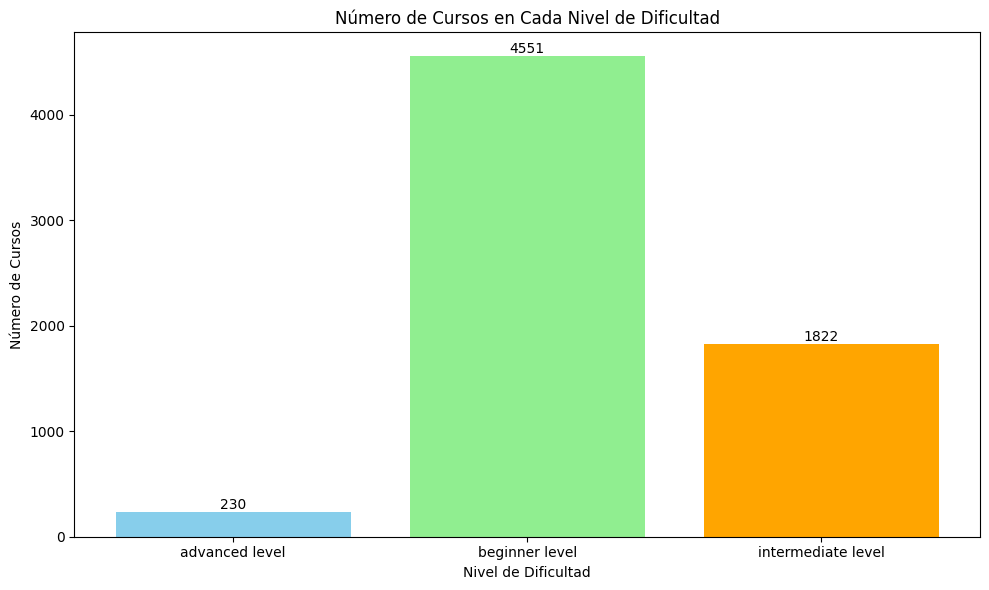

In [7]:
funciones.grafica_nivel_dificultad(df_valido)

## GRAFICA DE CANTIDAD DE CURSOS EN LAS PRINCIPALES 5 CATEGORIAS

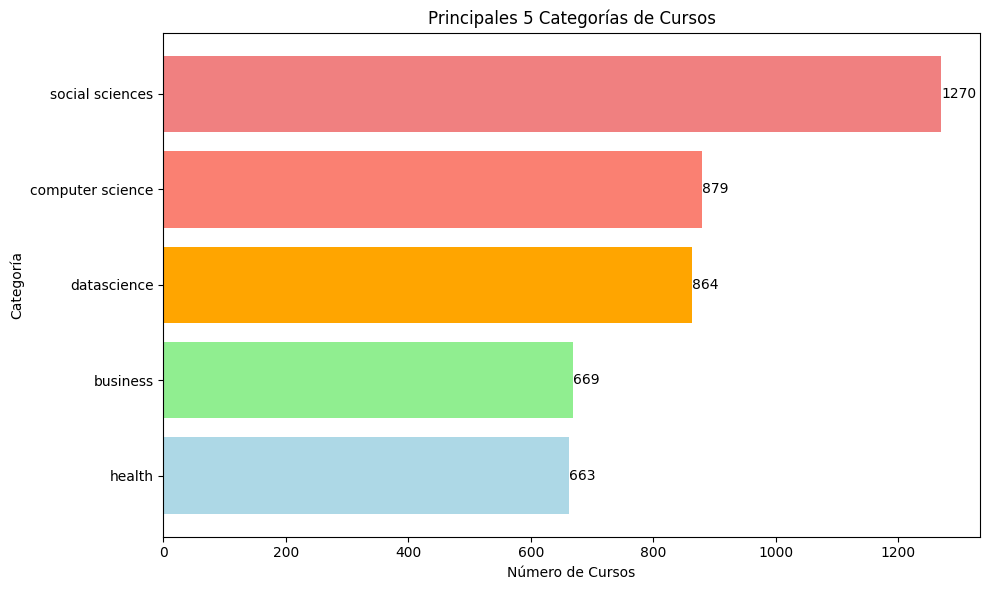

In [8]:
funciones.grafica_categorias(df_valido)

## GRAFICA DE RELACION ENTRE LA DURACION DEL CURSO Y LA CANTIDAD DE REVIEWS QUE TIENE

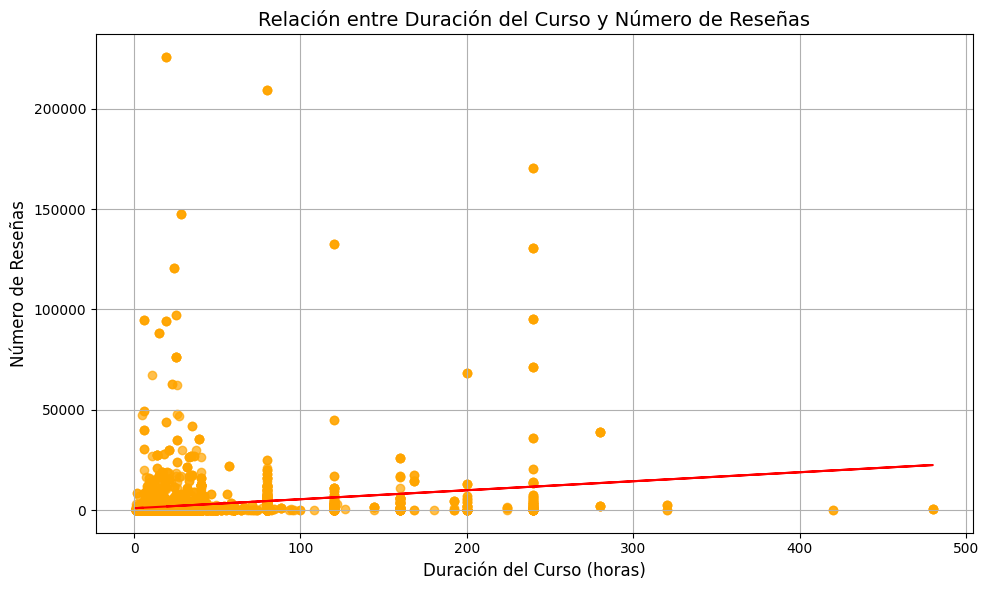

In [9]:
funciones.grafica_dispersion(df_valido)

## HISTOGRAMA DE LA DISTRIBUCION DE LAS DURACIONES DE LOS CURSOS

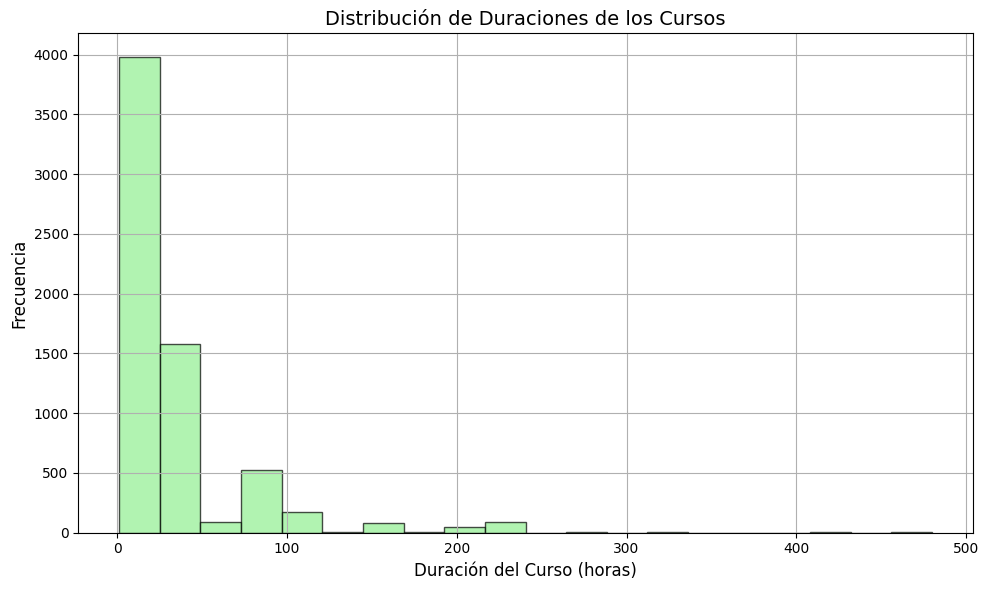

In [10]:
funciones.histograma_duraciones(df_valido)

## GRAFICA DE CAJA DE DISTRIBUCION DE LAS CALIFICACIONES SEGUN EL NIVEL DE DIFICULTAD

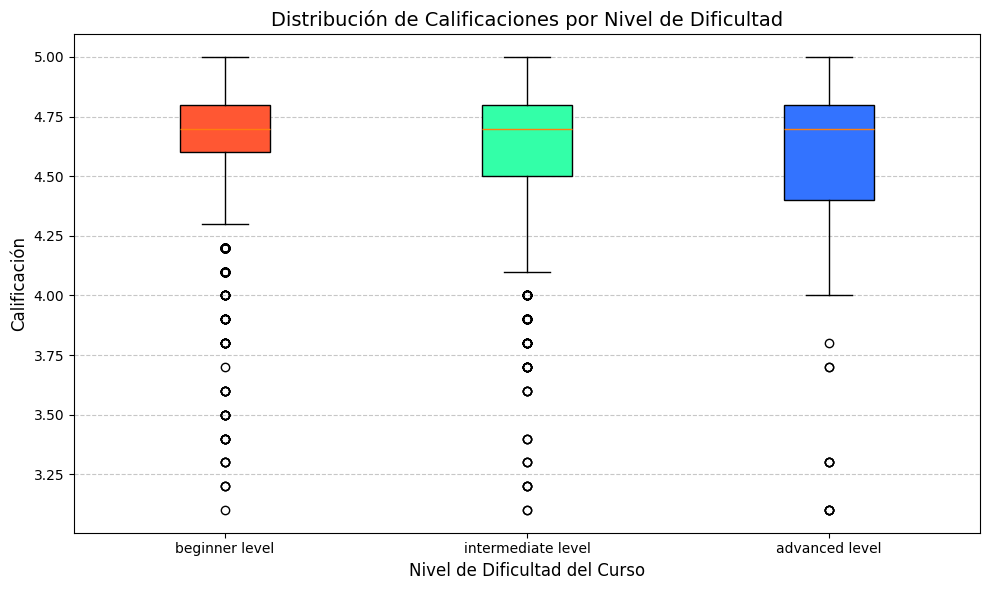

In [11]:
funciones.grafico_caja_calificaciones_por_nivel(df_valido)

# CONCLUSIONES

### Distribución de calificaciones por nivel de dificultad:

- Observamos que los cursos de nivel intermedio tienden a tener una calificación promedio más alta en comparación con los cursos de nivel principiante y avanzado.
- Los cursos avanzados tienen una mayor variabilidad en las calificaciones, lo que sugiere que pueden ser más desafiantes y, por lo tanto, recibir calificaciones más divergentes por parte de los estudiantes.

### Distribución de duraciones de cursos:

- La mayoría de los cursos tienen una duración concentrada en un rango de horas relativamente corto, probablemente cursos más breves y específicos.
- Sin embargo, también hay algunos cursos que tienen duraciones más largas, lo que puede indicar cursos más completos o extensos.

### Porcentaje de cursos con horario flexible:

- El porcentaje de cursos con horario flexible es relativamente bajo en comparación con el total de cursos en el conjunto de datos, lo que sugiere que la mayoría de los cursos tienen horarios fijos.

### Número de cursos en las principales categorías (keywords):

- Se observa que hay ciertas categorías de cursos que son más populares o más frecuentes que otras, lo que puede reflejar tendencias o áreas de interés comunes entre los estudiantes.

### Relación entre la duración del curso y el número de reviews:

- No se observa una relación clara entre la duración del curso y el número de reviews. Sin embargo, hay una concentración de cursos con duraciones más cortas y un número moderado de reviews.

### Distribución de calificaciones según el nivel de dificultad del curso:

- Se aprecia una variabilidad en las calificaciones según el nivel de dificultad del curso, con cursos intermedios que tienden a tener calificaciones más altas en general.

## En cuanto a la importancia del uso de Python y las librerías de análisis de datos como Pandas, NumPy y Matplotlib, podemos destacar varias razones:

- **Facilidad de uso**: Python es un lenguaje de programación de alto nivel y fácil de aprender, lo que lo hace accesible para usuarios de todos los niveles de experiencia.
- **Amplia disponibilidad de librerías**: Python cuenta con una amplia gama de librerías especializadas en análisis de datos, lo que permite a los usuarios realizar tareas complejas con relativa facilidad.
- **Eficiencia en el manejo de datos**: Pandas y NumPy proporcionan estructuras de datos eficientes y potentes para el manejo y manipulación de datos, lo que permite a los analistas realizar operaciones complejas de manera rápida y eficiente.
- **Visualización de datos**: Matplotlib ofrece una gran flexibilidad para crear visualizaciones personalizadas y de alta calidad, lo que permite a los analistas comunicar de manera efectiva los resultados del análisis de datos.
- **Comunidad activa y soporte**: Python cuenta con una gran comunidad de usuarios y desarrolladores que contribuyen constantemente con nuevas funcionalidades, correcciones de errores y recursos educativos, lo que garantiza su relevancia y actualización constante en el ámbito del análisis de datos.
